In [29]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
import math


In [30]:
df = pd.read_csv('spam.csv')
df = df.drop(['Unnamed: 2','Unnamed: 4','Unnamed: 3'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
print(df.groupby('v1').describe())

        v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4


In [32]:
df['v1'] = df.v1.map({'ham':0, 'spam':1})
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


c:\users\nikit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

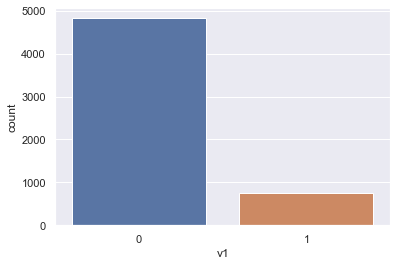

In [33]:
import seaborn as sns
sns.countplot(df["v1"])

In [34]:
def getCount(x):
  count = 0
  points = list(df['v1'])
  for i in range(0,len(points)):
    if points[i] == x:
      count += 1
  return count
dispersia = df['v1'].var()
print("Дисперсия:",dispersia)

avDis = pow(dispersia,0.5)

print("Среднеквадратичное отклонение:",avDis)
xAverage = df['v1'].mean()
print("Выборочное среднее:",xAverage)
nt = []
n = []

intervals = set(df['v1'])

for xi in intervals:
  nt.append(round((len(df)/avDis)*(1/pow(2*math.pi,0.5))*math.exp(-pow((xi-xAverage)/avDis,2)/2)))
  n.append(getCount(xi))
sum = 0
for i in range(0,len(n)):
  sum += pow(n[i] - nt[i],2)/nt[i]
print("Частота выборки:",n)
print("Теоретическая частота:",nt)
print("Критерий согласия:",sum)


Дисперсия: 0.11611107696339996
Среднеквадратичное отклонение: 0.34075075489776974
Выборочное среднее: 0.13406317300789664
Частота выборки: [4825, 747]
Теоретическая частота: [6038, 258]
Критерий согласия: 1170.510410809062


In [35]:
X = df.v2
y = df.v1

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4179,)
(1393,)
(4179,)
(1393,)


In [37]:
vect = CountVectorizer()

In [38]:
X_train_dtm = vect.fit_transform(X_train)

In [39]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [40]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 16969 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [62]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [63]:
y_pred_class = nb.predict(X_test_dtm)

In [64]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9856424982053122

In [65]:
cf_matrix=metrics.confusion_matrix(y_test, y_pred_class)
cf_matrix

array([[1205,    8],
       [  12,  168]], dtype=int64)

In [66]:
X_test[(y_pred_class==1) & (y_test==0)]

325                      No calls..messages..missed calls
4598              Have you laid your airtel line to rest?
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
45                       No calls..messages..missed calls
573                                Waiting for your call.
3373                              Also andros ice etc etc
1081                    Can u get pic msgs to your phone?
494                      Are you free now?can i call now?
Name: v2, dtype: object

In [67]:
X_test[(y_pred_class==0) & (y_test==1)]

4674    Hi babe its Chloe, how r u? I was smashed on s...
3528    Xmas & New Years Eve tickets are now on sale f...
1499    SMS. ac JSco: Energy is high, but u may not kn...
3417    LIFE has never been this much fun and great un...
2773    How come it takes so little time for a child w...
5       FreeMsg Hey there darling it's been 3 week's n...
1457    CLAIRE here am havin borin time & am now alone...
2429    Guess who am I?This is the first time I create...
4067    TBS/PERSOLVO. been chasing us since Sept for�3...
3358    Sorry I missed your call let's talk when you h...
2821    ROMCAPspam Everyone around should be respondin...
2247    Back 2 work 2morro half term over! Can U C me ...
Name: v2, dtype: object

In [68]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.9793166620866539

In [69]:
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
logreg = LogisticRegression()

In [70]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [71]:
y_pred_class = logreg.predict(X_test_dtm)

In [72]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.00305855, 0.01257388, 0.07207597, ..., 0.01665331, 0.00162354,
       0.00617932])

In [73]:
metrics.accuracy_score(y_test, y_pred_class)

0.9870782483847811

In [74]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9970138316387286

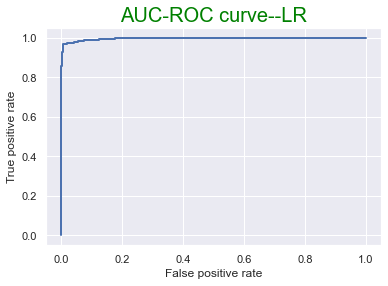

In [75]:
probs_lr= logreg.predict_proba(X_test_dtm)
probs_lr=probs_lr[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_lr)
plt.title("AUC-ROC curve--LR",color="green",fontsize=20)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linewidth=2, markersize=12)
plt.show()